In [1]:
import pandas as pd
import numpy as np

In [2]:
reviews = pd.read_json('../data/yelp_academic_dataset_review.json', lines=True, nrows=10000)

In [3]:
reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5,0,0,0,I called WVM on the recommendation of a couple...,2013-05-28 20:38:06
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2,1,1,1,I've stayed at many Marriott and Renaissance M...,2010-01-08 02:29:15
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4,0,0,0,The food is always great here. The service fro...,2011-07-28 18:05:01


In [7]:
reviews.drop(columns=['user_id','useful', 'funny', 'cool'], inplace=True)
reviews.head()

,review_id,business_id,stars,text,date
0,lWC-xP3rd6obsecCYsGZRg,buF9druCkbuXLX526sGELQ,4,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02
1,8bFej1QE5LXp4O05qjGqXA,RA4V8pr014UyUbDvI-LW2A,4,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25
2,NDhkzczKjLshODbqDoNLSg,_sS2LBIGNT5NQb6PD1Vtjw,5,I called WVM on the recommendation of a couple...,2013-05-28 20:38:06
3,T5fAqjjFooT4V0OeZyuk1w,0AzLzHfOJgL7ROwhdww2ew,2,I've stayed at many Marriott and Renaissance M...,2010-01-08 02:29:15
4,sjm_uUcQVxab_EeLCqsYLg,8zehGz9jnxPqXtOc7KaJxA,4,The food is always great here. The service fro...,2011-07-28 18:05:01


In [8]:
# Load the regular expression library
import re
# Remove punctuation
reviews['text_processed'] = reviews['text'].map(lambda x: re.sub('[,\.!?]', '', x))
# lower case text
reviews['text_processed'] = reviews['text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
reviews['text_processed'].head()

0    apparently prides osteria had a rough summer a...
1    this store is pretty good not as great as walm...
2    i called wvm on the recommendation of a couple...
3    i've stayed at many marriott and renaissance m...
4    the food is always great here the service from...
Name: text_processed, dtype: object

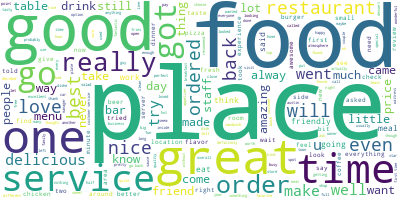

In [9]:
# Import the wordcloud library
from wordcloud import WordCloud# Join the different processed titles together.
long_string = ','.join(list(reviews['text_processed'].values))# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')# Generate a word cloud
wordcloud.generate(long_string)# Visualize the word cloud
wordcloud.to_image()

In [11]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = reviews.text_processed.values.tolist()
data_words = list(sent_to_words(data))# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to C:\Users\Lukas
[nltk_data]     Hestermeyer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['apparently', 'prides', 'osteria', 'rough', 'summer', 'evidenced', 'almost', 'empty', 'dining', 'room', 'friday', 'night', 'however', 'new', 'blood', 'kitchen', 'seems', 'revitalized', 'food', 'customers', 'recent', 'visits', 'waitstaff', 'warm', 'unobtrusive', 'pm', 'left', 'bar', 'full', 'dining']


In [12]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 3), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [13]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.011*"food" + 0.009*"good" + 0.009*"great" + 0.007*"time" + 0.007*"one" + '
  '0.007*"back" + 0.006*"place" + 0.006*"get" + 0.006*"like" + '
  '0.005*"service"'),
 (1,
  '0.011*"food" + 0.011*"place" + 0.007*"service" + 0.007*"like" + '
  '0.006*"time" + 0.006*"great" + 0.006*"good" + 0.006*"go" + 0.006*"us" + '
  '0.005*"one"'),
 (2,
  '0.013*"place" + 0.012*"great" + 0.010*"food" + 0.009*"good" + 0.007*"like" '
  '+ 0.007*"service" + 0.006*"one" + 0.006*"get" + 0.006*"nice" + '
  '0.005*"really"'),
 (3,
  '0.018*"good" + 0.011*"place" + 0.008*"food" + 0.008*"service" + '
  '0.008*"like" + 0.007*"one" + 0.006*"great" + 0.006*"go" + 0.006*"really" + '
  '0.006*"get"'),
 (4,
  '0.007*"get" + 0.007*"good" + 0.007*"great" + 0.006*"service" + '
  '0.006*"would" + 0.005*"back" + 0.005*"time" + 0.005*"really" + '
  '0.005*"place" + 0.005*"order"'),
 (5,
  '0.015*"good" + 0.010*"great" + 0.008*"place" + 0.008*"food" + 0.007*"like" '
  '+ 0.006*"service" + 0.005*"time" + 0.005*"would"

In [17]:
import pyLDAvis.gensim_models
import pickle 
import os
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('../results/ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
    
pyLDAvis.save_html(LDAvis_prepared, '../results/ldavis_prepared_'+ str(num_topics) +'.html')

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.012474 -0.004570       1        1  17.668842
1      0.001572 -0.002974       2        1  13.957427
6      0.003350  0.004841       3        1  12.599342
0      0.008751 -0.002776       4        1  11.850648
3      0.013611 -0.002977       5        1  10.294653
8     -0.002708 -0.003049       6        1   8.915475
5      0.006600 -0.002135       7        1   7.600067
2      0.007311  0.023605       8        1   7.232138
4     -0.017992 -0.025704       9        1   5.123237
9     -0.032968  0.015740      10        1   4.758170, topic_info=      Term         Freq        Total Category  logprob  loglift
56    good  4950.000000  4950.000000  Default  30.0000  30.0000
146  would  2615.000000  2615.000000  Default  29.0000  29.0000
168  great  4151.000000  4151.000000  Default  28.0000  28.0000
223  place  4956.000000  4956.000000  Default  27.0000  27.0000
219   nice  1713.000000  1713.000000  Default  26.0000  26.0000
..     ...          ...          ...      ...      ...      ...
56    good    98.972751  4950.041873  Topic10  -5.5417  -0.8670
3     also    73.925095  2078.768872  Topic10  -5.8334  -0.2912
71    like    83.910471  3491.304096  Topic10  -5.7067  -0.6830
167    get    77.368911  3152.339856  Topic10  -5.7879  -0.6620
246    got    68.027507  1786.459009  Topic10  -5.9166  -0.2228

[849 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
23174      8  0.867927  abby
24494      6  0.722429   abf
7178       3  0.687739  adbf
17015      6  0.241023   adt
17015      8  0.241023   adt
...      ...       ...   ...
6351       9  0.052930  yoga
21593      5  0.720807   yoi
24493      5  0.720136  yost
18306      1  0.626200  zaza
23260      9  0.580612   ここと

[2368 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 2, 7, 1, 4, 9, 6, 3, 5, 10])